In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
%matplotlib inline

In [16]:
ipos = pd.read_csv(r'C:\Users\sandhyao\Downloads\Python Projects\ipo_data.csv',encoding='latin-1')
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2/3/2016,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,$24.00,$28.97,$28.32,18.00%,$4.97,$4.32,3,NaN
1,2/3/2016,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,$16.00,$18.00,$18.20,13.75%,$2.00,$2.20,2,NaN
2,2/11/2016,AveXis,AVXS,Goldman Sachs/ Jefferies,$20.00,$18.02,$18.05,-9.75%,($1.98),($1.95),2,Missed
3,2/11/2016,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,$8.00,$8.00,$6.64,-17.00%,$0.00,($1.36),1,NaN
4,2/24/2016,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,$10.00,$10.01,$10.21,2.10%,$0.01,$0.21,1,NaN
5,3/3/2016,Jensyn Acquisition,JSYNU,Chardan Capital Markets,$10.00,$9.95,$9.95,-0.50%,($0.05),($0.05),1,NaN
6,3/3/2016,Syndax Pharmaceuticals,SNDX,Morgan Stanley/ Citigroup,$12.00,$12.11,$12.01,0.08%,$0.11,$0.01,1,NaN
7,3/11/2016,KLR Energy Acquisition,KLREU,EarlyBirdCapital,$10.00,$10.00,$10.00,0.00%,$0.00,$0.00,1,NaN
8,3/22/2016,Corvus Pharmaceuticals,CRVS,Credit Suisse/ Cowen and Company,$15.00,$15.00,$14.25,-5.00%,$0.00,($0.75),1,NaN
9,4/7/2016,Aeglea BioTherapeutics,AGLE,UBS Investment Bank/ BMO Capital Markets/ Well...,$10.00,$10.40,$9.77,-2.30%,$0.40,($0.23),1,NaN


In [17]:
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else
x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else
x.replace('%',''))
ipos = ipos.applymap(lambda x: x if not '(' in str(x) else
x.replace('(',''))
ipos = ipos.applymap(lambda x: x if not ')' in str(x) else
x.replace(')',''))
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2/3/2016,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN
1,2/3/2016,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN
2,2/11/2016,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed
3,2/11/2016,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN
4,2/24/2016,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN
5,3/3/2016,Jensyn Acquisition,JSYNU,Chardan Capital Markets,10.00,9.95,9.95,-0.50,0.05,0.05,1,NaN
6,3/3/2016,Syndax Pharmaceuticals,SNDX,Morgan Stanley/ Citigroup,12.00,12.11,12.01,0.08,0.11,0.01,1,NaN
7,3/11/2016,KLR Energy Acquisition,KLREU,EarlyBirdCapital,10.00,10.00,10.00,0.00,0.00,0.00,1,NaN
8,3/22/2016,Corvus Pharmaceuticals,CRVS,Credit Suisse/ Cowen and Company,15.00,15.00,14.25,-5.00,0.00,0.75,1,NaN
9,4/7/2016,Aeglea BioTherapeutics,AGLE,UBS Investment Bank/ BMO Capital Markets/ Well...,10.00,10.40,9.77,-2.30,0.40,0.23,1,NaN


In [18]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773 entries, 0 to 2772
Data columns (total 12 columns):
Date                        2773 non-null object
Issuer                      2773 non-null object
Symbol                      2773 non-null object
Lead/Joint-Lead Managers    2773 non-null object
Offer Price                 2773 non-null object
Opening Price               2773 non-null object
1st Day Close               2773 non-null object
1st Day % Px Chng           2773 non-null object
$ Chg Opening               2773 non-null object
$ Chg Close                 2773 non-null object
Star Ratings                2773 non-null object
Performed                   314 non-null object
dtypes: object(12)
memory usage: 260.0+ KB


In [19]:
ipos.replace('N/C',0, inplace=True)
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng '] = ipos['1st Day % Px Chng '].astype('float')
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float')
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 120-11-01 00:00:00

In [20]:
ipos[ipos['Date']=='11/120']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
908,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.00,17.00,18.40,15.00,1.00,2.40,1,NaN


In [21]:
ipos.loc[908, 'Date'] = '2012-11-20'

In [22]:
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float')
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float')
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

In [23]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773 entries, 0 to 2772
Data columns (total 12 columns):
Date                        2773 non-null datetime64[ns]
Issuer                      2773 non-null object
Symbol                      2773 non-null object
Lead/Joint-Lead Managers    2773 non-null object
Offer Price                 2773 non-null float64
Opening Price               2773 non-null float64
1st Day Close               2773 non-null float64
1st Day % Px Chng           2773 non-null float64
$ Chg Opening               2773 non-null float64
$ Chg Close                 2773 non-null float64
Star Ratings                2773 non-null int32
Performed                   314 non-null object
dtypes: datetime64[ns](1), float64(6), int32(1), object(4)
memory usage: 249.2+ KB


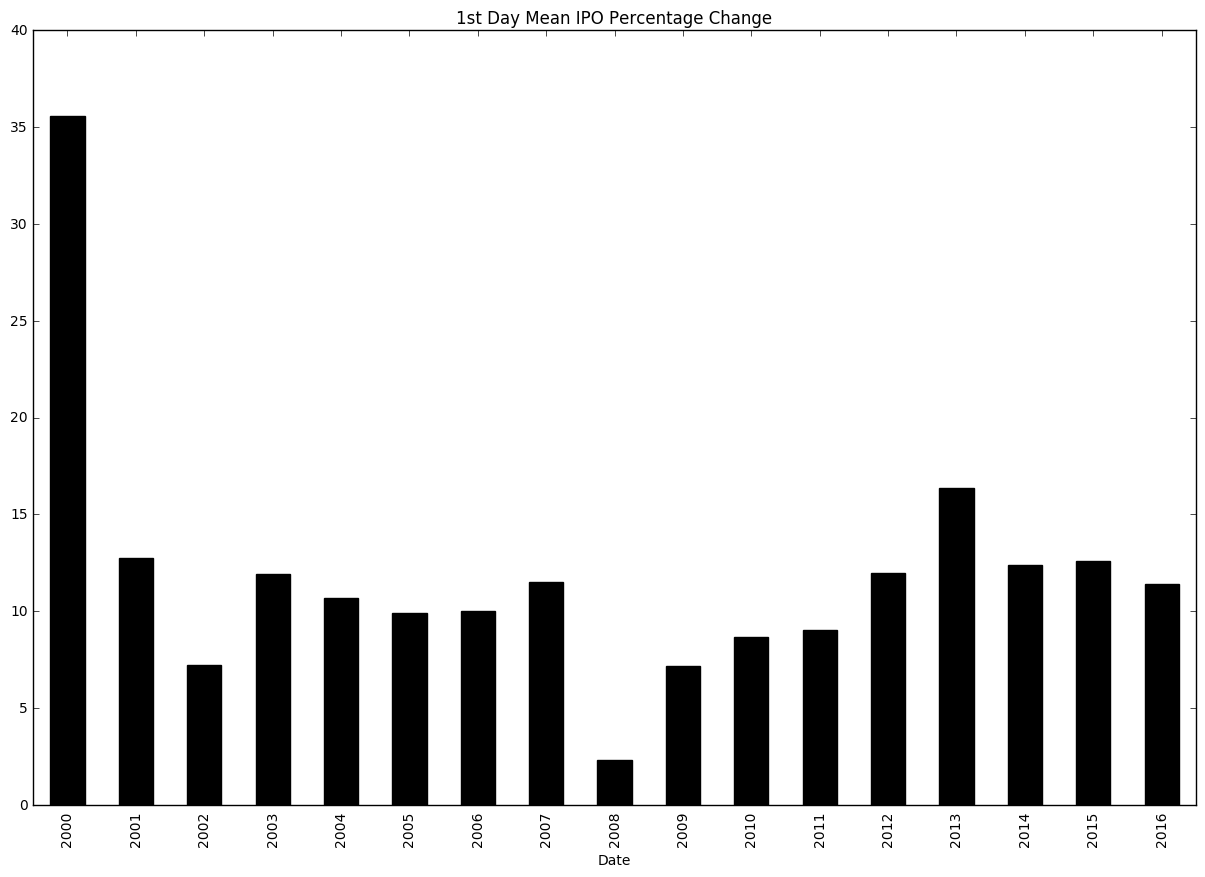

In [24]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].mean().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Mean IPO Percentage Change')

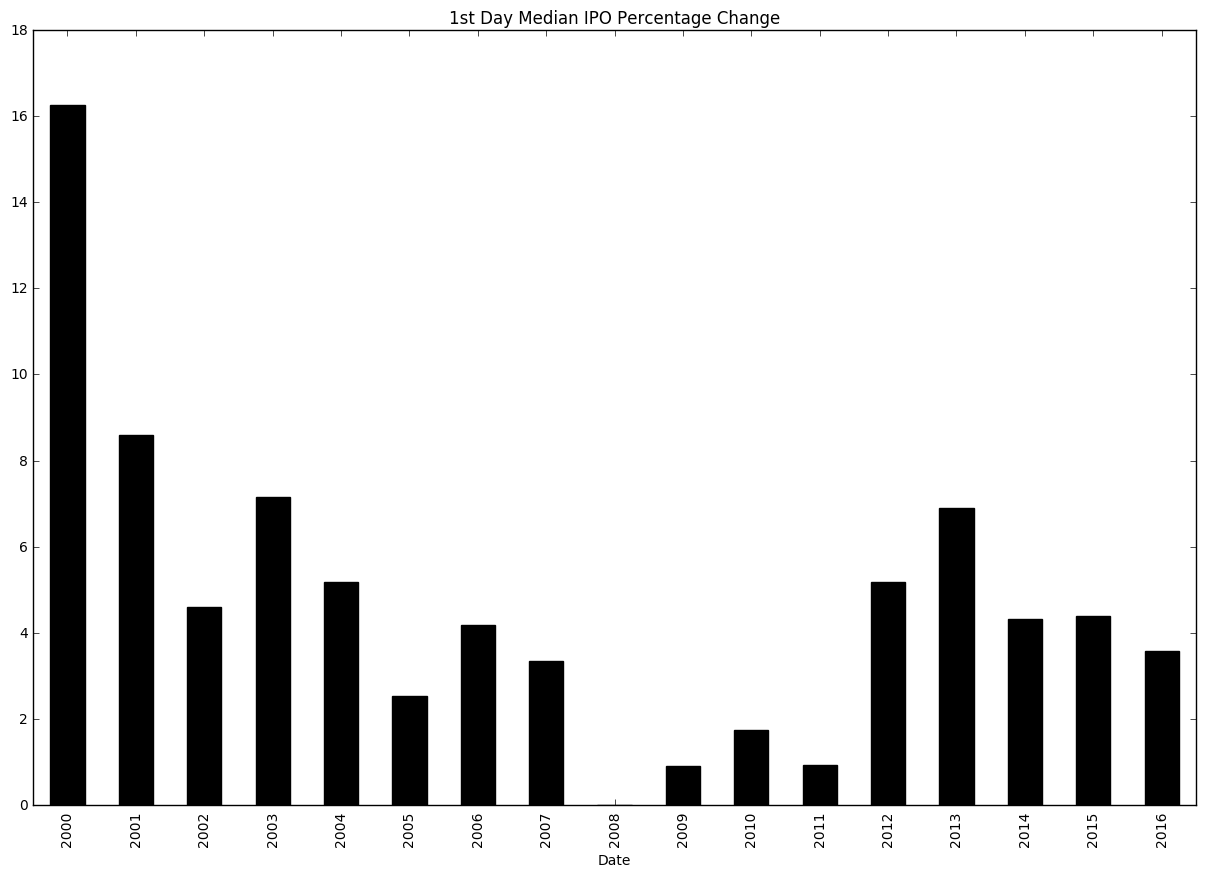

In [25]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng']\
.median().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Median IPO Percentage Change')

In [26]:
ipos['1st Day % Px Chng'].describe()

count    2773.000000
mean       13.198611
std        27.777751
min       -35.220000
25%         0.000000
50%         4.550000
75%        19.050000
max       353.850000
Name: 1st Day % Px Chng, dtype: float64

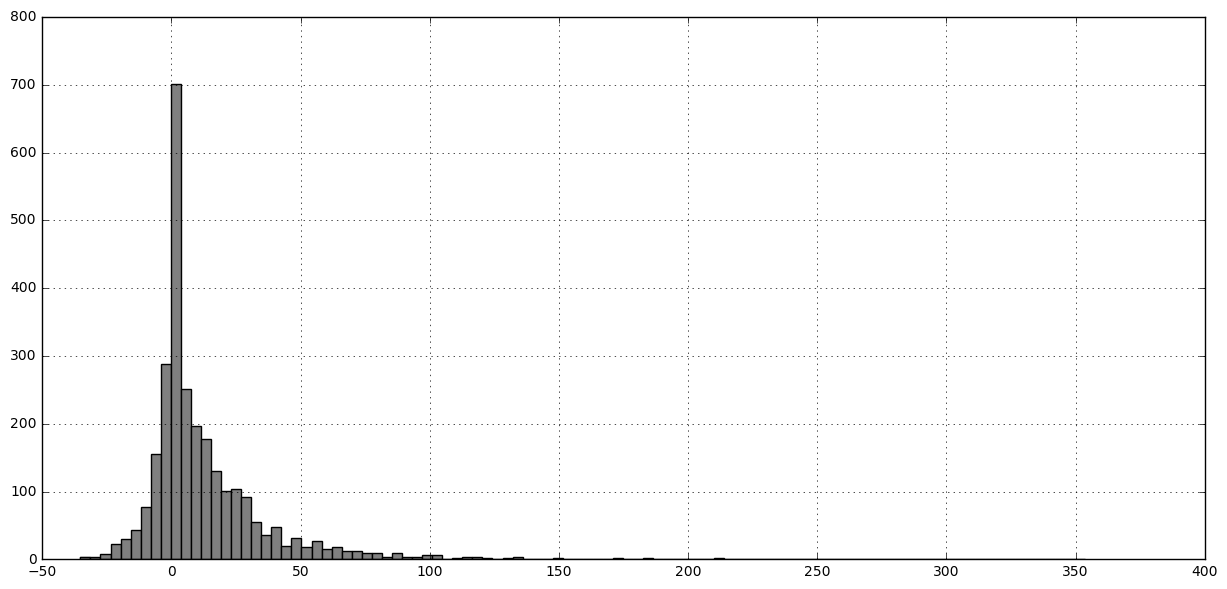

In [27]:
ipos['1st Day % Px Chng'].hist(figsize=(15,7), bins=100, color='grey')

In [28]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN,-0.65,-2.243700
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN,0.20,1.111111
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,1.98,1.95,2,Missed,-0.03,-0.166482
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,1.36,1,NaN,1.36,17.000000
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN,0.20,1.998002
5,2016-03-03,Jensyn Acquisition,JSYNU,Chardan Capital Markets,10.00,9.95,9.95,-0.50,0.05,0.05,1,NaN,0.00,0.000000
6,2016-03-03,Syndax Pharmaceuticals,SNDX,Morgan Stanley/ Citigroup,12.00,12.11,12.01,0.08,0.11,0.01,1,NaN,-0.10,-0.825764
7,2016-03-11,KLR Energy Acquisition,KLREU,EarlyBirdCapital,10.00,10.00,10.00,0.00,0.00,0.00,1,NaN,0.00,0.000000
8,2016-03-22,Corvus Pharmaceuticals,CRVS,Credit Suisse/ Cowen and Company,15.00,15.00,14.25,-5.00,0.00,0.75,1,NaN,0.75,5.000000
9,2016-04-07,Aeglea BioTherapeutics,AGLE,UBS Investment Bank/ BMO Capital Markets/ Well...,10.00,10.40,9.77,-2.30,0.40,0.23,1,NaN,-0.17,-1.634615


In [29]:
ipos['% Chg Open to Close'].describe()

count    2773.000000
mean        2.851300
std        10.161947
min      -106.601942
25%        -0.881057
50%         0.984529
75%         5.610561
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [30]:
ipos[ipos['% Chg Open to Close']<-106]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
250,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.0,5.15,13.36,11.33,6.85,1.36,1,NaN,-5.49,-106.601942


In [31]:
ipos.loc[250,'Opening Price'] = ipos.loc[250, 'Offer Price'] 

In [32]:
ipos[ipos['% Chg Open to Close']<-53]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
250,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.0,12.00,13.36,11.33,6.85,1.36,1,NaN,-5.49,-106.601942
1868,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,3.67,6.22,0.22,1,NaN,-6.00,-98.522167


In [33]:
ipos.loc[1868,'Opening Price'] = ipos.loc[1868, 'Offer Price'] 

In [34]:
ipos['$ Chg Opening'] = ipos['Opening Price'] - ipos['Offer Price']
ipos['$ Chg Close'] = ipos['1st Day Close'] - ipos['Offer Price']
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100
ipos['% Chg Open to Close'].describe()

count    2773.000000
mean        1.302072
std        10.344294
min       -49.281222
25%        -2.847458
50%         0.000000
75%         4.032258
max       113.333333
Name: % Chg Open to Close, dtype: float64

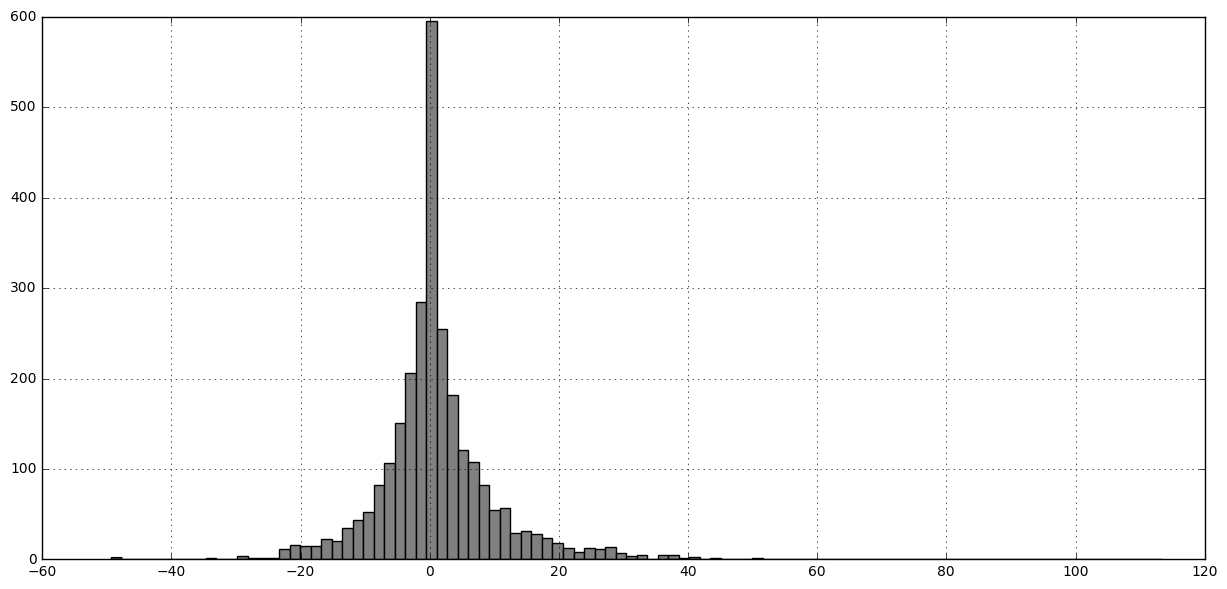

In [35]:
ipos['% Chg Open to Close'].hist(figsize=(15,7), bins=100, color='grey')

In [36]:
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].describe()

count    254.000000
mean       0.143543
std        2.225974
min       -6.160000
25%       -0.647500
50%        0.000000
75%        0.532500
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [37]:
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].sum()

36.46000000000002

In [38]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    115.000000
mean       1.399304
std        2.560994
min        0.010000
25%        0.200000
50%        0.650000
75%        1.500000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [39]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']<0)]['$ Chg Open to Close'].describe()

count    123.000000
mean      -1.011870
std        1.145319
min       -6.160000
25%       -1.245000
50%       -0.700000
75%       -0.215000
max       -0.010000
Name: $ Chg Open to Close, dtype: float64

In [ ]:
#Feature Engineering

In [57]:
sp = pd.read_csv(r'C:\Users\sandhyao\Downloads\Python Projects\spy.csv',encoding='latin-1')
sp.sort_values('Date', inplace=True)
sp.reset_index(drop=True, inplace=True)
sp

,Date,Open,High,Low,Close,Volume,Adj Close
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1455.219971
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1399.420044
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1402.109985
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1403.449951
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1441.469971
5,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1064800000,1457.599976
6,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1014000000,1438.560059
7,2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,974600000,1432.250000
8,2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1030400000,1449.680054
9,2000-01-14,1449.680054,1473.000000,1449.680054,1465.150024,1085900000,1465.150024


In [58]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 8
        chg = (sp.iloc[day_ago_idx]['Close'] - \
               sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [59]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

error 2015-02-21
error 2015-02-21
error 2013-11-16
error 2009-08-01


In [60]:
ipos[ipos['Date']=='2009-08-01']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
1236,2009-08-01,Emdeon,EM,Morgan Stanley,15.0,17.5,16.52,10.13,2.5,1.52,3,NaN,-0.98,-5.6,NaN


In [61]:
ipos[ipos['Date']=='2013-11-16']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
737,2013-11-16,Wix.com Ltd.,WIX,J.P. Morgan/ BofA Merrill Lynch/ RBC Capital M...,16.5,18.5,16.31,-1.15,2.0,-0.19,3,NaN,-2.19,-11.837838,NaN


In [62]:
ipos[ipos['Date']=='2015-02-21']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
156,2015-02-21,Baozun,BZUN,Morgan Stanley/ Credit Suisse/ BofA Merrill Lynch,10.0,10.25,10.44,4.40,0.25,0.44,1,NaN,0.19,1.853659,NaN
157,2015-02-21,Community Healthcare Trust,CHCT,Sandler ONeill + Partners/ SunTrust Robinson H...,19.0,19.00,19.75,3.95,0.00,0.75,1,NaN,0.75,3.947368,NaN


In [63]:
ipos.loc[1236, 'Date'] = pd.to_datetime('2009-08-12')
ipos.loc[737, 'Date'] = pd.to_datetime('2012-11-20')
ipos.loc[156, 'Date'] = pd.to_datetime('2015-05-21')
ipos.loc[157, 'Date'] = pd.to_datetime('2015-05-21')

In [64]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

In [65]:
def get_cto_chg(ipo_dt):
    try:
        today_open_idx = sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        chg = (sp.iloc[today_open_idx]['Open'] - \
               sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt)

In [66]:
ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg)

In [67]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN,-0.65,-2.243700,-0.202947,0.212289
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN,0.20,1.111111,-0.202947,0.212289
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,-1.98,-1.95,2,Missed,0.03,0.166482,-4.512783,-0.262438
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,-1.36,1,NaN,-1.36,-17.000000,-4.512783,-0.262438
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN,0.20,1.998002,5.040242,-0.193099
5,2016-03-03,Jensyn Acquisition,JSYNU,Chardan Capital Markets,10.00,9.95,9.95,-0.50,-0.05,-0.05,1,NaN,0.00,0.000000,2.104855,-0.042789
6,2016-03-03,Syndax Pharmaceuticals,SNDX,Morgan Stanley/ Citigroup,12.00,12.11,12.01,0.08,0.11,0.01,1,NaN,-0.10,-0.825764,2.104855,-0.042789
7,2016-03-11,KLR Energy Acquisition,KLREU,EarlyBirdCapital,10.00,10.00,10.00,0.00,0.00,0.00,1,NaN,0.00,0.000000,0.567138,0.258348
8,2016-03-22,Corvus Pharmaceuticals,CRVS,Credit Suisse/ Cowen and Company,15.00,15.00,14.25,-5.00,0.00,-0.75,1,NaN,-0.75,-5.000000,3.117767,-0.144288
9,2016-04-07,Aeglea BioTherapeutics,AGLE,UBS Investment Bank/ BMO Capital Markets/ Well...,10.00,10.40,9.77,-2.30,0.40,-0.23,1,NaN,-0.63,-6.057692,1.453566,-0.176609


In [75]:
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Managers'].map(lambda x:x.split('/')[0])
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())

In [76]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(),
columns=['Name']).sort('Name')['Name']:
    print(n)

A.G. Edwards
A.G. Edwards & Sons
A.G. Edwrads & Sons
AG Edwards
AG Edwards & Sons
AG Edwrads
Adams Harkness
Advest
Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Anderson & Strudrick
Axiom Capital Management
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
Baird
Baird, BMO Capital Markets, Janney Montgomery Scott
Banc of America
Banc of America Securities
Barclay Capital
Barclays
Barclays Capital
Bear Stearns
Bear Streans
Bear, Stearns
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lynch
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CE Unterberg Towbin
CIBC World Markets
CIBC Worldwide
CRT Capital
CRT Capital Group
CS First Boston
CSFB
CSFirst Boston
Canaccord Genuity
Cantor Fitzgerald
Cantor Fitzgerald & Co.
Capital Growth Financial
Casimir Capital
Chardan Capital Markets
Chase H&Q
China Inter'l
China International
Cit
Citi
Citigroup
Cohen
Cohen & Company Capital Markets, LLC  

C:\Users\sandhyao\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [77]:
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'

ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'

ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'

ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'

ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'

ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'

ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'

ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'

ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'

ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'

ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'

ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'

ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'

ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'

ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'

ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'

ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'

ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'

ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'

ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'

ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'

ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'

ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'

ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'

ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'

ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'

ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'

ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'

ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'

ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'

ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'

ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'

ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'

ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [78]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(),
columns=['Name']).sort_values('Name')['Name']:
    print(n)

AG Edwards
Adams Harkness
Advest
Aegis Capital
Anderson & Strudrick
Axiom Capital Management
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
Banc of America
Barclays
Bear Stearns
BofA Merrill Lynch
Broadband Capital
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CE Unterberg Towbin
CIBC
CRT Capital
CSFB
Canaccord Genuity
Cantor Fitzgerald
Capital Growth Financial
Casimir Capital
Chardan Capital Markets
Chase H&Q
China International
Citigroup
Cohen & Co.
Cowen & Co.
Craig-Hallum Capital
DA Davidson
DBAB
DLJ
Dain Rauscher Wessels
Dawson James Securities
Deutsche Bank
Donald
Donaldson Lufkin & Jenrette
Donaldson, Lufkin & Jenrette
EarlyBirdCapital
Equity Securities
FIG Partners
FTN Midwest Securities
Feltl & Co.
Ferris Baker Watts
First Albany
First Van Kasper
Friedman Billings Ramsey
GS
Gilford Securities
Global Hunter Securities, LLC
Goldman Sachs
Gunn Allen
HCFP Brenner
I-Bankers
ING Barings
Imperial Capital
JMP Securities
JP Morgan
JP Turner
Janney Montgomery Scott
Jef

In [79]:
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: len(x.split('/')))

In [80]:
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues',2:'Wed',\
     3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
ipos['Month'] = ipos['Date'].map(lambda x: x.month)
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun',7:'Jul',\
     8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,3,NaN,-0.65,-2.243700,-0.202947,0.212289,Goldman Sachs,3,Wed,Feb
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,2,NaN,0.20,1.111111,-0.202947,0.212289,Morgan Stanley,2,Wed,Feb
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,-1.98,-1.95,2,Missed,0.03,0.166482,-4.512783,-0.262438,Goldman Sachs,2,Thurs,Feb
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,-1.36,1,NaN,-1.36,-17.000000,-4.512783,-0.262438,Leerink Partners,2,Thurs,Feb
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,1,NaN,0.20,1.998002,5.040242,-0.193099,Deutsche Bank,3,Wed,Feb
5,2016-03-03,Jensyn Acquisition,JSYNU,Chardan Capital Markets,10.00,9.95,9.95,-0.50,-0.05,-0.05,1,NaN,0.00,0.000000,2.104855,-0.042789,Chardan Capital Markets,1,Thurs,Mar
6,2016-03-03,Syndax Pharmaceuticals,SNDX,Morgan Stanley/ Citigroup,12.00,12.11,12.01,0.08,0.11,0.01,1,NaN,-0.10,-0.825764,2.104855,-0.042789,Morgan Stanley,2,Thurs,Mar
7,2016-03-11,KLR Energy Acquisition,KLREU,EarlyBirdCapital,10.00,10.00,10.00,0.00,0.00,0.00,1,NaN,0.00,0.000000,0.567138,0.258348,EarlyBirdCapital,1,Fri,Mar
8,2016-03-22,Corvus Pharmaceuticals,CRVS,Credit Suisse/ Cowen and Company,15.00,15.00,14.25,-5.00,0.00,-0.75,1,NaN,-0.75,-5.000000,3.117767,-0.144288,CSFB,2,Tues,Mar
9,2016-04-07,Aeglea BioTherapeutics,AGLE,UBS Investment Bank/ BMO Capital Markets/ Well...,10.00,10.40,9.77,-2.30,0.40,-0.23,1,NaN,-0.63,-6.057692,1.453566,-0.176609,UBS Investment Bank,3,Thurs,Apr


In [81]:
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100
ipos['Open to Close Pct'] = (ipos['$ Chg Close'].astype('float') -\
ipos['$ Chg Opening'].astype('float'))/\
ipos['Opening Price'].astype('float') * 100

In [82]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2016-02-03,"BeiGene, Ltd.",BGNE,Goldman Sachs/ Morgan Stanley/ Cowen and Company,24.00,28.97,28.32,18.00,4.97,4.32,...,-0.65,-2.243700,-0.202947,0.212289,Goldman Sachs,3,Wed,Feb,17.155678,-2.243700
1,2016-02-03,Editas Medicine,EDIT,Morgan Stanley/ J.P. Morgan,16.00,18.00,18.20,13.75,2.00,2.20,...,0.20,1.111111,-0.202947,0.212289,Morgan Stanley,2,Wed,Feb,11.111111,1.111111
2,2016-02-11,AveXis,AVXS,Goldman Sachs/ Jefferies,20.00,18.02,18.05,-9.75,-1.98,-1.95,...,0.03,0.166482,-4.512783,-0.262438,Goldman Sachs,2,Thurs,Feb,-10.987791,0.166482
3,2016-02-11,Proteostasis Therapeutics,PTI,Leerink Partners/ RBC Capital Markets,8.00,8.00,6.64,-17.00,0.00,-1.36,...,-1.36,-17.000000,-4.512783,-0.262438,Leerink Partners,2,Thurs,Feb,0.000000,-17.000000
4,2016-02-24,Silver Run Acquisition,SRAQU,Deutsche Bank Securities/ Citigroup/ Goldman S...,10.00,10.01,10.21,2.10,0.01,0.21,...,0.20,1.998002,5.040242,-0.193099,Deutsche Bank,3,Wed,Feb,0.099900,1.998002
5,2016-03-03,Jensyn Acquisition,JSYNU,Chardan Capital Markets,10.00,9.95,9.95,-0.50,-0.05,-0.05,...,0.00,0.000000,2.104855,-0.042789,Chardan Capital Markets,1,Thurs,Mar,-0.502513,0.000000
6,2016-03-03,Syndax Pharmaceuticals,SNDX,Morgan Stanley/ Citigroup,12.00,12.11,12.01,0.08,0.11,0.01,...,-0.10,-0.825764,2.104855,-0.042789,Morgan Stanley,2,Thurs,Mar,0.908340,-0.825764
7,2016-03-11,KLR Energy Acquisition,KLREU,EarlyBirdCapital,10.00,10.00,10.00,0.00,0.00,0.00,...,0.00,0.000000,0.567138,0.258348,EarlyBirdCapital,1,Fri,Mar,0.000000,0.000000
8,2016-03-22,Corvus Pharmaceuticals,CRVS,Credit Suisse/ Cowen and Company,15.00,15.00,14.25,-5.00,0.00,-0.75,...,-0.75,-5.000000,3.117767,-0.144288,CSFB,2,Tues,Mar,0.000000,-5.000000
9,2016-04-07,Aeglea BioTherapeutics,AGLE,UBS Investment Bank/ BMO Capital Markets/ Well...,10.00,10.40,9.77,-2.30,0.40,-0.23,...,-0.63,-6.057692,1.453566,-0.176609,UBS Investment Bank,3,Thurs,Apr,3.846154,-6.057692


In [83]:
from patsy import dmatrix
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") +\
    Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") +\
    Q("SP Close to Open Chg Pct") + Q("SP Week Change")', data=ipos,return_type='dataframe')
X

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,17.155678,4.97,24.00,28.97,0.212289,-0.202947
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.111111,2.00,16.00,18.00,0.212289,-0.202947
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,-10.987791,-1.98,20.00,18.02,-0.262438,-4.512783
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.000000,0.00,8.00,8.00,-0.262438,-4.512783
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.099900,0.01,10.00,10.01,-0.193099,5.040242
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.502513,-0.05,10.00,9.95,-0.042789,2.104855
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.908340,0.11,12.00,12.11,-0.042789,2.104855
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.00,10.00,10.00,0.258348,0.567138
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.000000,0.00,15.00,15.00,-0.144288,3.117767
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.846154,0.40,10.00,10.40,-0.176609,1.453566


In [84]:
#Binary classification

In [85]:
# 2188 is the first index of 2015 data - data is date sorted
X_train, X_test = X[:2188], X[2188:]
y_train = ipos['$ Chg Open to Close'][:2188].map(lambda x: 1 if x >= 1 else 0)
y_test = ipos['$ Chg Open to Close'][2188:].map(lambda x: 1 if x >= 1 else 0)

In [86]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
clf.score(X_test, y_test)

0.74017094017094021

In [88]:
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].describe()

count    254.000000
mean       0.143543
std        2.225974
min       -6.160000
25%       -0.647500
50%        0.000000
75%        0.532500
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [89]:
pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,
ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])
rf

,index,$ chg,predicted,actual,correct
0,2188,-0.80,0,0,1
1,2189,-0.15,0,0,1
2,2190,-0.21,0,0,1
3,2191,1.48,0,1,0
4,2192,-2.47,0,0,1
5,2193,1.96,0,1,0
6,2194,-0.26,0,0,1
7,2195,0.00,0,0,1
8,2196,-0.49,0,0,1
9,2197,2.17,0,1,0


In [90]:
rf[rf['predicted']==1]['$ chg'].describe()

count    39.000000
mean      2.182051
std       7.257509
min      -9.870000
25%      -2.170000
50%       0.510000
75%       5.325000
max      20.600000
Name: $ chg, dtype: float64

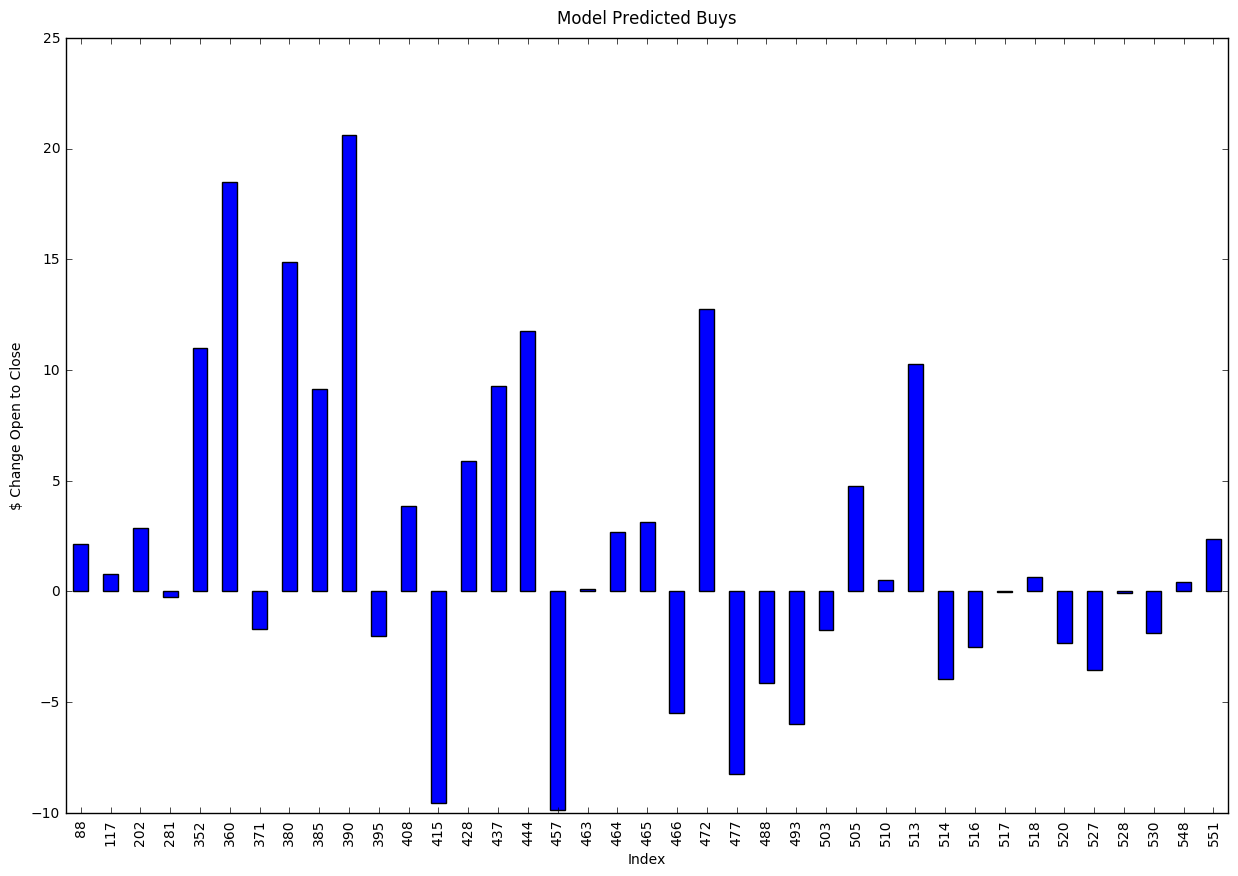

In [91]:
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

In [92]:
X_train, X_test = X[:2188], X[2188:]
y_train = ipos['$ Chg Open to Close'][:2188].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][2188:].map(lambda x: 1 if x >= .25 else 0)
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.56923076923076921

In [93]:
pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,
ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()

count    74.000000
mean      1.759189
std       5.721602
min      -9.870000
25%      -0.987500
50%       0.445000
75%       3.505000
max      20.600000
Name: $ chg, dtype: float64

In [94]:
X_train, X_test = X[:1900], X[1900:]
y_train = ipos['$ Chg Open to Close'][:1900].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][1900:].map(lambda x: 1 if x >= .25 else 0)
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.59450171821305842

In [95]:
pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,
ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()

count    84.000000
mean      1.754286
std       8.150718
min     -15.870000
25%      -1.435000
50%       0.445000
75%       2.395000
max      56.540000
Name: $ chg, dtype: float64

In [96]:
#Feature importance

In [98]:
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.242409,"Q(""Lead Mgr"")[T.BMO Capital Markets]"
1,1.057152,"Q(""Lead Mgr"")[T.Wachovia]"
2,0.741073,"Q(""Lead Mgr"")[T.C.E. Unterberg, Towbin]"
3,0.735586,"Q(""Lead Mgr"")[T.Wedbush Morgan]"
4,0.733081,"Q(""Lead Mgr"")[T.Anderson & Strudrick]"
5,0.630507,"Q(""Lead Mgr"")[T.Burnham Securities]"
6,0.608263,"Q(""Lead Mgr"")[T.Canaccord Genuity]"
7,0.590423,"Q(""Lead Mgr"")[T.Morgan Keegan]"
8,0.582796,"Q(""Lead Mgr"")[T.FIG Partners]"
9,0.569295,"Q(""Lead Mgr"")[T.Bear Stearns]"


In [99]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,-0.628091,"Q(""Week Day"")[T.Mon]"
13,0.007774,"Q(""Week Day"")[T.Thurs]"
14,0.005808,"Q(""Week Day"")[T.Tues]"
15,-0.120328,"Q(""Week Day"")[T.Wed]"


In [100]:
ipos[ipos['Lead Mgr'].str.contains('Keegan|Towbin')]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
1004,2011-06-22,Fidus Investment,FDUS,Morgan Keegan,15.0,14.75,15.00,0.00,-0.25,0.00,...,0.25,1.694915,1.930797,-0.003091,Morgan Keegan,1,Wed,Jun,-1.694915,1.694915
1356,2007-02-26,Rosetta Genomics,ROSG,"C.E. Unterberg, Towbin",7.0,7.02,7.32,4.57,0.02,0.32,...,0.30,4.273504,0.479826,-0.010330,"C.E. Unterberg, Towbin",1,Mon,Feb,0.284900,4.273504
1946,2005-08-04,Advanced Life Sciences,ADLS,"C.E. Unterberg, Towbin/ThinkEquity Partners",5.0,5.03,6.00,20.00,0.03,1.00,...,0.97,19.284294,1.302654,0.000000,"C.E. Unterberg, Towbin",2,Thurs,Aug,0.596421,19.284294
2393,2002-05-21,Computer Programs and Systems,CPSI,Morgan Keegan/Raymond James,16.5,17.50,18.12,9.82,1.00,1.62,...,0.62,3.542857,1.758604,0.000000,Morgan Keegan,2,Tues,May,5.714286,3.542857
2474,2001-05-23,Smith & Wollensky,SWRG,CE Unterberg Towbin,8.5,8.51,7.77,-8.59,0.01,-0.73,...,-0.74,-8.695652,5.114513,0.000000,CE Unterberg Towbin,1,Wed,May,0.117509,-8.695652
2532,2001-12-14,Northwest Biotherapeutics,NWBT,"C.E. Unterberg, Towbin",5.0,5.10,5.31,6.20,0.10,0.31,...,0.21,4.117647,-2.220479,0.000000,"C.E. Unterberg, Towbin",1,Fri,Dec,1.960784,4.117647
2664,2000-08-09,Millennium Cell,MCEL,Morgan Keegan,10.0,10.00,10.00,0.00,0.00,0.00,...,0.00,0.000000,4.430627,0.000000,Morgan Keegan,1,Wed,Aug,0.000000,0.000000
2694,2000-08-25,ServiceWare Technologies,SVCW,"C.E. Unterberg, Towbin",7.0,8.50,8.75,25.00,1.50,1.75,...,0.25,2.941176,1.608699,0.000000,"C.E. Unterberg, Towbin",1,Fri,Aug,17.647059,2.941176


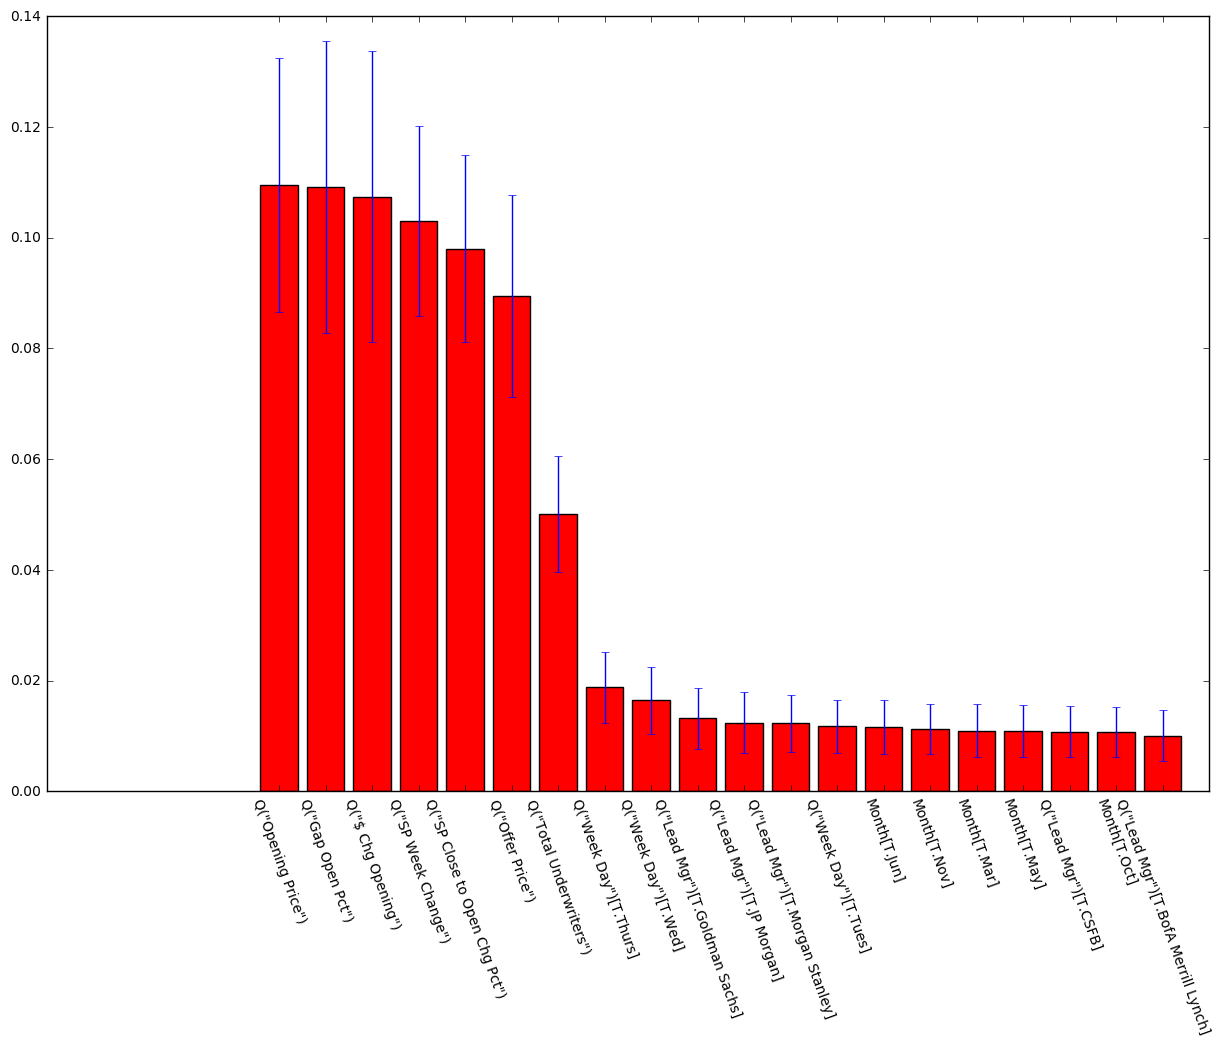

In [101]:
clf_rf = RandomForestClassifier(n_estimators=1000)
clf_rf.fit(X_train, y_train)
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)
imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]
plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);